# Exploratory Data Analysis (EDA) - Health XAI Prediction

**Dataset:** ESS (European Social Survey) Health Data  
**Project:** Prediction and Local Explainable AI (XAI) in Healthcare  
**Week 1-2 Tasks:** Complete EDA following structured checklist approach  

This notebook follows a comprehensive 9-point EDA checklist to thoroughly understand our healthcare dataset before modeling.

## Setup and Imports

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import os
import sys

# Add project root to path for imports
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")
print(f"📁 Project root: {project_root}")
print(f"🐍 Python version: {sys.version.split()[0]}")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"📊 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🌊 Seaborn version: {sns.__version__}")

✅ All libraries imported successfully!
📁 Project root: /Users/peter/Desktop/health_xai_prediction
🐍 Python version: 3.13.5
🐼 Pandas version: 2.2.3
📊 Matplotlib version: 3.10.8
🌊 Seaborn version: 0.13.2


# 🧭 1. Dataset Overview
**Goal:** Understand what your data looks like.

This section covers:
- ✅ Shape of dataset → `df.shape`
- ✅ Data types of each column → `df.dtypes`
- ✅ Quick preview → `df.head()`, `df.sample(5)`
- ✅ Summary statistics → `df.describe(include='all')`
- ✅ Number of unique values per column → `df.nunique()`
- ✅ Target variable distribution (classification/regression)

### Load Dataset

In [2]:
# Load the dataset
data_path = '../data/raw/ess.csv'

print(f"🔍 Loading dataset from: {data_path}")
df = pd.read_csv(data_path)

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"📋 Columns: {len(df.columns)}")
print(f"📄 Rows: {len(df)}")

# Quick preview
print("\n" + "="*50)
print("📖 FIRST 5 ROWS:")
print("="*50)
display(df.head())

print("\n" + "="*50)
print("🎲 RANDOM SAMPLE (5 rows):")
print("="*50)
display(df.sample(5, random_state=42))

🔍 Loading dataset from: ../data/raw/ess.csv
✅ Dataset loaded successfully!
📊 Dataset shape: (42377, 26)
📋 Columns: 26
📄 Rows: 42377

📖 FIRST 5 ROWS:


,Unnamed: 0,cntry,happy,sclmeet,inprdsc,health,ctrlife,etfruit,eatveg,dosprt,cgtsmok,alcfreq,height,weighta,fltdpr,flteeff,slprl,wrhpp,fltlnl,enjlf,fltsd,hltprhc,hltprhb,hltprdi,gndr,paccnois
0,1,AT,8.0,4.0,1.0,3.0,8.0,3.0,3.0,3.0,4.0,3.0,178,90,1.0,1.0,1.0,3.0,1.0,3.0,1.0,0,1,0,1,0
1,2,AT,9.0,7.0,4.0,2.0,8.0,1.0,1.0,5.0,5.0,3.0,168,74,2.0,2.0,3.0,3.0,3.0,4.0,2.0,1,0,0,2,0
2,3,AT,9.0,4.0,4.0,1.0,9.0,4.0,3.0,3.0,1.0,4.0,180,95,2.0,2.0,3.0,3.0,1.0,3.0,1.0,0,0,0,2,0
3,4,AT,7.0,6.0,3.0,3.0,8.0,2.0,2.0,3.0,6.0,7.0,167,70,2.0,2.0,3.0,2.0,2.0,2.0,2.0,0,1,1,2,0
4,5,AT,9.0,5.0,4.0,2.0,9.0,3.0,3.0,3.0,1.0,2.0,168,67,1.0,1.0,1.0,3.0,1.0,3.0,1.0,0,0,0,1,0



🎲 RANDOM SAMPLE (5 rows):


,Unnamed: 0,cntry,happy,sclmeet,inprdsc,health,ctrlife,etfruit,eatveg,dosprt,cgtsmok,alcfreq,height,weighta,fltdpr,flteeff,slprl,wrhpp,fltlnl,enjlf,fltsd,hltprhc,hltprhb,hltprdi,gndr,paccnois
18082,18083,GR,5.0,5.0,4.0,2.0,2.0,3.0,3.0,0.0,6.0,6.0,155,72,1.0,2.0,3.0,2.0,2.0,3.0,1.0,0,0,0,2,0
16270,16271,GR,8.0,6.0,1.0,3.0,10.0,4.0,2.0,2.0,2.0,4.0,183,90,1.0,1.0,2.0,3.0,2.0,4.0,1.0,0,0,0,1,0
40412,40413,SI,9.0,6.0,4.0,1.0,7.0,6.0,3.0,7.0,6.0,2.0,160,47,1.0,1.0,1.0,4.0,1.0,4.0,1.0,0,0,0,2,0
2296,2297,BE,10.0,4.0,4.0,2.0,9.0,5.0,3.0,0.0,2.0,4.0,167,65,2.0,3.0,2.0,4.0,2.0,3.0,1.0,0,0,0,2,0
19372,19373,HR,9.0,4.0,2.0,3.0,5.0,3.0,3.0,5.0,6.0,4.0,180,95,1.0,1.0,1.0,3.0,1.0,3.0,1.0,0,1,0,1,0


### Data Types and Basic Info

In [3]:
# Dataset info and data types
print("📋 DATASET INFO:")
print("="*50)
print(df.info())

print("\n" + "="*50)
print("🔢 DATA TYPES SUMMARY:")
print("="*50)
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

print("\n" + "="*50)
print("🎯 COLUMNS BY DATA TYPE:")
print("="*50)
for dtype in df.dtypes.unique():
    cols = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype}: {len(cols)} columns")
    print(f"   → {cols}")

# Display data types for all columns
print("\n" + "="*50)
print("📊 ALL COLUMN DATA TYPES:")
print("="*50)
dtypes_df = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Null_Count': df.isnull().sum()
})
display(dtypes_df)

📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42377 entries, 0 to 42376
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  42377 non-null  int64  
 1   cntry       42377 non-null  object 
 2   happy       42260 non-null  float64
 3   sclmeet     42306 non-null  float64
 4   inprdsc     42169 non-null  float64
 5   health      42339 non-null  float64
 6   ctrlife     42205 non-null  float64
 7   etfruit     42284 non-null  float64
 8   eatveg      42282 non-null  float64
 9   dosprt      41926 non-null  float64
 10  cgtsmok     42305 non-null  float64
 11  alcfreq     42180 non-null  float64
 12  height      42377 non-null  int64  
 13  weighta     42377 non-null  int64  
 14  fltdpr      42224 non-null  float64
 15  flteeff     42231 non-null  float64
 16  slprl       42264 non-null  float64
 17  wrhpp       42144 non-null  float64
 18  fltlnl      42209 non-null  float64
 19  enjlf    

,Column,Data_Type,Non_Null_Count,Null_Count
Unnamed: 0,Unnamed: 0,int64,42377,0
cntry,cntry,object,42377,0
happy,happy,float64,42260,117
sclmeet,sclmeet,float64,42306,71
inprdsc,inprdsc,float64,42169,208
health,health,float64,42339,38
ctrlife,ctrlife,float64,42205,172
etfruit,etfruit,float64,42284,93
eatveg,eatveg,float64,42282,95
dosprt,dosprt,float64,41926,451


### Summary Statistics and Unique Values

In [4]:
# Summary statistics for all columns
print("📊 SUMMARY STATISTICS (ALL COLUMNS):")
print("="*50)
summary_stats = df.describe(include='all')
display(summary_stats)

# Number of unique values per column
print("\n" + "="*50)
print("🔢 UNIQUE VALUES PER COLUMN:")
print("="*50)
unique_counts = df.nunique().sort_values(ascending=False)
unique_df = pd.DataFrame({
    'Column': unique_counts.index,
    'Unique_Values': unique_counts.values,
    'Unique_Percentage': (unique_counts.values / len(df) * 100).round(2)
})
display(unique_df.head(20))

print(f"\n📈 Columns with high cardinality (>50% unique): {sum(unique_df['Unique_Percentage'] > 50)}")
print(f"📈 Columns with very low cardinality (<5 unique): {sum(unique_df['Unique_Values'] < 5)}")
print(f"📈 Potential identifier columns (>95% unique): {sum(unique_df['Unique_Percentage'] > 95)}")

📊 SUMMARY STATISTICS (ALL COLUMNS):


,Unnamed: 0,cntry,happy,sclmeet,inprdsc,health,ctrlife,etfruit,eatveg,dosprt,cgtsmok,alcfreq,height,weighta,fltdpr,flteeff,slprl,wrhpp,fltlnl,enjlf,fltsd,hltprhc,hltprhb,hltprdi,gndr,paccnois
count,42377.000000,42377,42260.000000,42306.000000,42169.000000,42339.000000,42205.000000,42284.000000,42282.000000,41926.000000,42305.000000,42180.000000,42377.000000,42377.000000,42224.000000,42231.000000,42264.000000,42144.000000,42209.000000,42116.000000,42208.000000,42377.000000,42377.000000,42377.000000,42377.000000,42377.000000
unique,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,GR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21189.000000,NaN,7.394628,4.786082,2.720434,2.144666,7.373581,3.220864,3.155267,3.158374,4.346791,4.635396,171.021922,76.022654,1.441787,1.680685,1.776003,2.888573,1.434078,2.861122,1.572664,0.113151,0.213323,0.065460,1.525946,0.044906
std,12233.330515,NaN,1.838132,1.580821,1.425431,0.905196,2.024204,1.310744,1.112567,2.598722,1.833068,2.048302,9.528851,14.830795,0.668567,0.788910,0.830790,0.808456,0.714619,0.853827,0.679488,0.316781,0.409659,0.247339,0.499332,0.207101
min,1.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,120.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10595.000000,NaN,7.000000,4.000000,2.000000,1.000000,6.000000,2.000000,2.000000,0.000000,3.000000,3.000000,164.000000,65.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,21189.000000,NaN,8.000000,5.000000,3.000000,2.000000,8.000000,3.000000,3.000000,3.000000,5.000000,5.000000,170.000000,75.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,31783.000000,NaN,9.000000,6.000000,4.000000,3.000000,9.000000,4.000000,4.000000,5.000000,6.000000,7.000000,178.000000,85.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000



🔢 UNIQUE VALUES PER COLUMN:


,Column,Unique_Values,Unique_Percentage
0,Unnamed: 0,42377,100.00
1,weighta,104,0.25
2,height,73,0.17
3,cntry,28,0.07
4,happy,11,0.03
5,ctrlife,11,0.03
6,dosprt,8,0.02
7,inprdsc,7,0.02
8,etfruit,7,0.02
9,eatveg,7,0.02



📈 Columns with high cardinality (>50% unique): 1
📈 Columns with very low cardinality (<5 unique): 12
📈 Potential identifier columns (>95% unique): 1


# 🧹 2. Missing Values & Data Quality
**Goal:** Detect and plan to handle incomplete or incorrect data.

This section covers:
- ✅ Missing values → `df.isnull().sum()`
- ✅ Percentage of missing data per feature
- ✅ Duplicates → `df.duplicated().sum()`
- ✅ Outliers (boxplots, z-scores, IQR)
- ✅ Constant or quasi-constant features (low variance)
- ✅ Inconsistent labels (e.g., "Male" vs "male" vs "M")

🕳️ MISSING VALUES ANALYSIS:


,Column,Missing_Count,Missing_Percentage
9,dosprt,451,1.06
19,enjlf,261,0.62
17,wrhpp,233,0.55
4,inprdsc,208,0.49
11,alcfreq,197,0.46
6,ctrlife,172,0.41
20,fltsd,169,0.40
18,fltlnl,168,0.40
14,fltdpr,153,0.36
15,flteeff,146,0.34


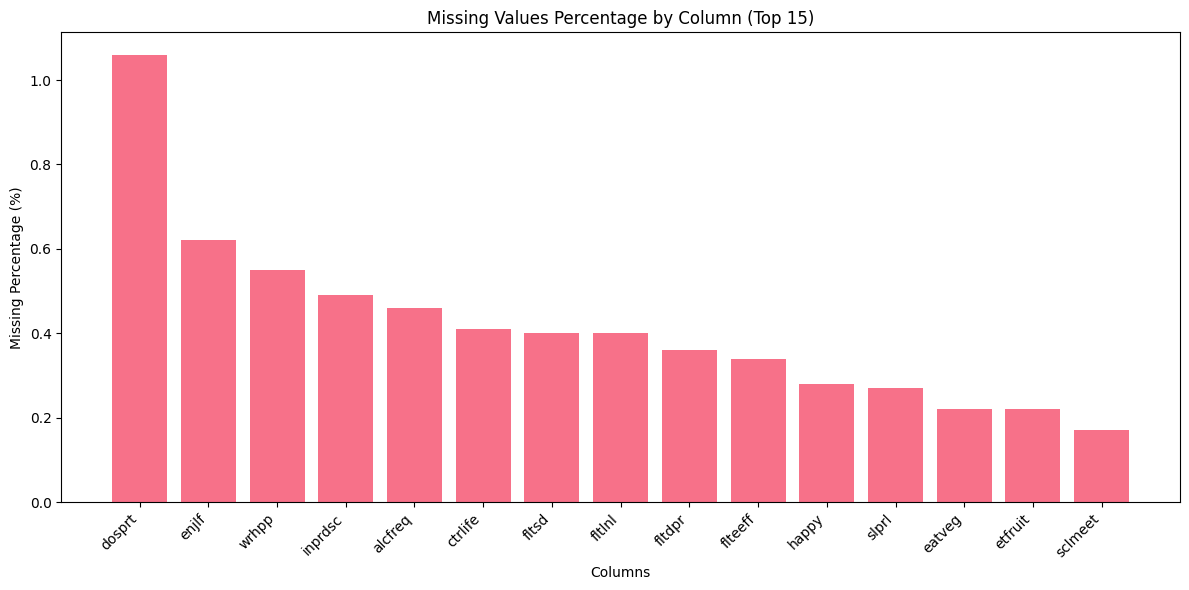


📊 Summary:
   → Columns with missing values: 17
   → Highest missing percentage: 1.06%
   → Columns with >50% missing: 0


In [5]:
# Missing values analysis
print("🕳️ MISSING VALUES ANALYSIS:")
print("="*50)

missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})

# Filter columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'][:15], missing_df['Missing_Percentage'][:15])
    plt.title('Missing Values Percentage by Column (Top 15)')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Summary:")
    print(f"   → Columns with missing values: {len(missing_df)}")
    print(f"   → Highest missing percentage: {missing_df['Missing_Percentage'].max():.2f}%")
    print(f"   → Columns with >50% missing: {sum(missing_df['Missing_Percentage'] > 50)}")
else:
    print("✅ No missing values found in the dataset!")

### Duplicates and Data Quality Checks

In [6]:
# Duplicate rows analysis
print("🔍 DUPLICATE ROWS ANALYSIS:")
print("="*50)

duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df) * 100).round(2)

print(f"Total duplicate rows: {duplicate_count}")
print(f"Duplicate percentage: {duplicate_percentage}%")

if duplicate_count > 0:
    print(f"📋 Sample duplicated rows:")
    duplicate_mask = df.duplicated(keep=False)
    display(df[duplicate_mask].head())
else:
    print("✅ No duplicate rows found!")

# Constant/quasi-constant features
print("\n" + "="*50)
print("🎯 CONSTANT/QUASI-CONSTANT FEATURES:")
print("="*50)

variance_threshold = 0.01  # Features with very low variance
quasi_constant_features = []

for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].var() < variance_threshold:
        quasi_constant_features.append(col)

if quasi_constant_features:
    print(f"Features with variance < {variance_threshold}:")
    for feature in quasi_constant_features:
        unique_vals = df[feature].nunique()
        most_common_val = df[feature].mode().iloc[0] if len(df[feature].mode()) > 0 else 'N/A'
        most_common_freq = (df[feature] == most_common_val).sum()
        print(f"   → {feature}: {unique_vals} unique values, most common: {most_common_val} ({most_common_freq} times)")
else:
    print("✅ No quasi-constant features found!")

# Check for potential identifier columns
print("\n" + "="*50)
print("🆔 POTENTIAL IDENTIFIER COLUMNS:")
print("="*50)
identifier_cols = [col for col in df.columns if df[col].nunique() / len(df) > 0.95]
if identifier_cols:
    print(f"Columns with >95% unique values (potential IDs): {identifier_cols}")
else:
    print("✅ No clear identifier columns found!")

🔍 DUPLICATE ROWS ANALYSIS:
Total duplicate rows: 0
Duplicate percentage: 0.0%
✅ No duplicate rows found!

🎯 CONSTANT/QUASI-CONSTANT FEATURES:
✅ No quasi-constant features found!

🆔 POTENTIAL IDENTIFIER COLUMNS:
Columns with >95% unique values (potential IDs): ['Unnamed: 0']


# 📏 3. Feature Types and Encoding Needs
**Goal:** Separate variables by type to plan encoding.

This section covers:
- ✅ Numerical features (continuous, discrete)
- ✅ Categorical features (nominal, ordinal)
- ✅ Date/time features
- ✅ Textual or unstructured columns
- ✅ Identify potential derived features

In [7]:
# Feature type classification
print("🔢 FEATURE TYPE CLASSIFICATION:")
print("="*50)

# Numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Categorical features (object, category, bool)
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Date/time features
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

# Text features (string columns with high cardinality)
text_cols = []
for col in categorical_cols:
    if df[col].nunique() > 50 and df[col].dtype == 'object':
        # Check if it looks like text (average length > 10)
        avg_length = df[col].dropna().astype(str).str.len().mean()
        if avg_length > 10:
            text_cols.append(col)

# Remove text columns from categorical
categorical_cols = [col for col in categorical_cols if col not in text_cols]

# Further classify numerical features
discrete_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_count = df[col].nunique()
    total_count = len(df[col].dropna())
    
    # If unique values are less than 10% of total observations, likely discrete
    if unique_count < total_count * 0.1 or unique_count <= 20:
        discrete_cols.append(col)
    else:
        continuous_cols.append(col)

# Binary features (only 2 unique values)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

print(f"📊 FEATURE TYPE SUMMARY:")
print(f"   → Total columns: {len(df.columns)}")
print(f"   → Numerical: {len(numerical_cols)} ({len(discrete_cols)} discrete, {len(continuous_cols)} continuous)")
print(f"   → Categorical: {len(categorical_cols)}")
print(f"   → Binary: {len(binary_cols)}")
print(f"   → DateTime: {len(datetime_cols)}")
print(f"   → Text: {len(text_cols)}")

# Display feature categorization
feature_types_df = pd.DataFrame({
    'Feature_Type': ['Continuous', 'Discrete', 'Categorical', 'Binary', 'DateTime', 'Text'],
    'Count': [len(continuous_cols), len(discrete_cols), len(categorical_cols), 
              len(binary_cols), len(datetime_cols), len(text_cols)],
    'Columns': [continuous_cols[:5] if len(continuous_cols) > 5 else continuous_cols,
                discrete_cols[:5] if len(discrete_cols) > 5 else discrete_cols,
                categorical_cols[:5] if len(categorical_cols) > 5 else categorical_cols,
                binary_cols[:5] if len(binary_cols) > 5 else binary_cols,
                datetime_cols[:5] if len(datetime_cols) > 5 else datetime_cols,
                text_cols[:5] if len(text_cols) > 5 else text_cols]
})

display(feature_types_df)

# Show sample values for each type
print("\n" + "="*50)
print("📋 SAMPLE VALUES BY FEATURE TYPE:")
print("="*50)

if len(continuous_cols) > 0:
    print(f"\n🔢 Continuous features (sample):")
    sample_continuous = continuous_cols[:3]
    for col in sample_continuous:
        sample_vals = df[col].dropna().head(5).tolist()
        print(f"   → {col}: {sample_vals}")

if len(discrete_cols) > 0:
    print(f"\n🎯 Discrete features (sample):")
    sample_discrete = discrete_cols[:3]
    for col in sample_discrete:
        unique_vals = sorted(df[col].dropna().unique())[:10]
        print(f"   → {col}: {unique_vals}")

if len(categorical_cols) > 0:
    print(f"\n📂 Categorical features (sample):")
    sample_categorical = categorical_cols[:3]
    for col in sample_categorical:
        unique_vals = df[col].value_counts().head(5).index.tolist()
        print(f"   → {col}: {unique_vals}")

if len(binary_cols) > 0:
    print(f"\n⚪ Binary features (sample):")
    sample_binary = binary_cols[:3]
    for col in sample_binary:
        unique_vals = df[col].dropna().unique().tolist()
        print(f"   → {col}: {unique_vals}")

🔢 FEATURE TYPE CLASSIFICATION:
📊 FEATURE TYPE SUMMARY:
   → Total columns: 26
   → Numerical: 25 (24 discrete, 1 continuous)
   → Categorical: 1
   → Binary: 5
   → DateTime: 0
   → Text: 0


,Feature_Type,Count,Columns
0,Continuous,1,[Unnamed: 0]
1,Discrete,24,"[happy, sclmeet, inprdsc, health, ctrlife]"
2,Categorical,1,[cntry]
3,Binary,5,"[hltprhc, hltprhb, hltprdi, gndr, paccnois]"
4,DateTime,0,[]
5,Text,0,[]



📋 SAMPLE VALUES BY FEATURE TYPE:

🔢 Continuous features (sample):
   → Unnamed: 0: [1, 2, 3, 4, 5]

🎯 Discrete features (sample):
   → happy: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]
   → sclmeet: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0)]
   → inprdsc: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0)]

📂 Categorical features (sample):
   → cntry: ['GR', 'IT', 'DE', 'AT', 'BG']

⚪ Binary features (sample):
   → hltprhc: [0, 1]
   → hltprhb: [1, 0]
   → hltprdi: [0, 1]


# 📈 4. Univariate Analysis
**Goal:** Study each variable's distribution.

This section covers:
- ✅ Histograms / KDE plots for numerical variables
- ✅ Count plots for categorical variables  
- ✅ Check skewness, kurtosis
- ✅ Identify variables that may need transformation

📊 NUMERICAL FEATURES ANALYSIS:


,Column,Skewness,Kurtosis,Min,Max,Mean,Std
0,Unnamed: 0,0.000,-1.200,1.0,42377.0,21189.000,12233.331
1,happy,-0.974,1.270,0.0,10.0,7.395,1.838
2,sclmeet,-0.431,-0.706,1.0,7.0,4.786,1.581
3,inprdsc,0.112,-0.476,0.0,6.0,2.720,1.425
4,health,0.549,-0.011,1.0,5.0,2.145,0.905
5,ctrlife,-0.894,0.840,0.0,10.0,7.374,2.024
6,etfruit,0.541,0.041,1.0,7.0,3.221,1.311
7,eatveg,0.539,0.572,1.0,7.0,3.155,1.113
8,dosprt,0.239,-1.343,0.0,7.0,3.158,2.599
9,cgtsmok,-0.736,-0.869,1.0,6.0,4.347,1.833



🚨 Features requiring attention:
   → Highly skewed (|skewness| > 1): 8 features
     ['fltdpr', 'flteeff', 'fltlnl', 'fltsd', 'hltprhc', 'hltprhb', 'hltprdi', 'paccnois']
   → High kurtosis (|kurtosis| > 3): 3 features
     ['hltprhc', 'hltprdi', 'paccnois']


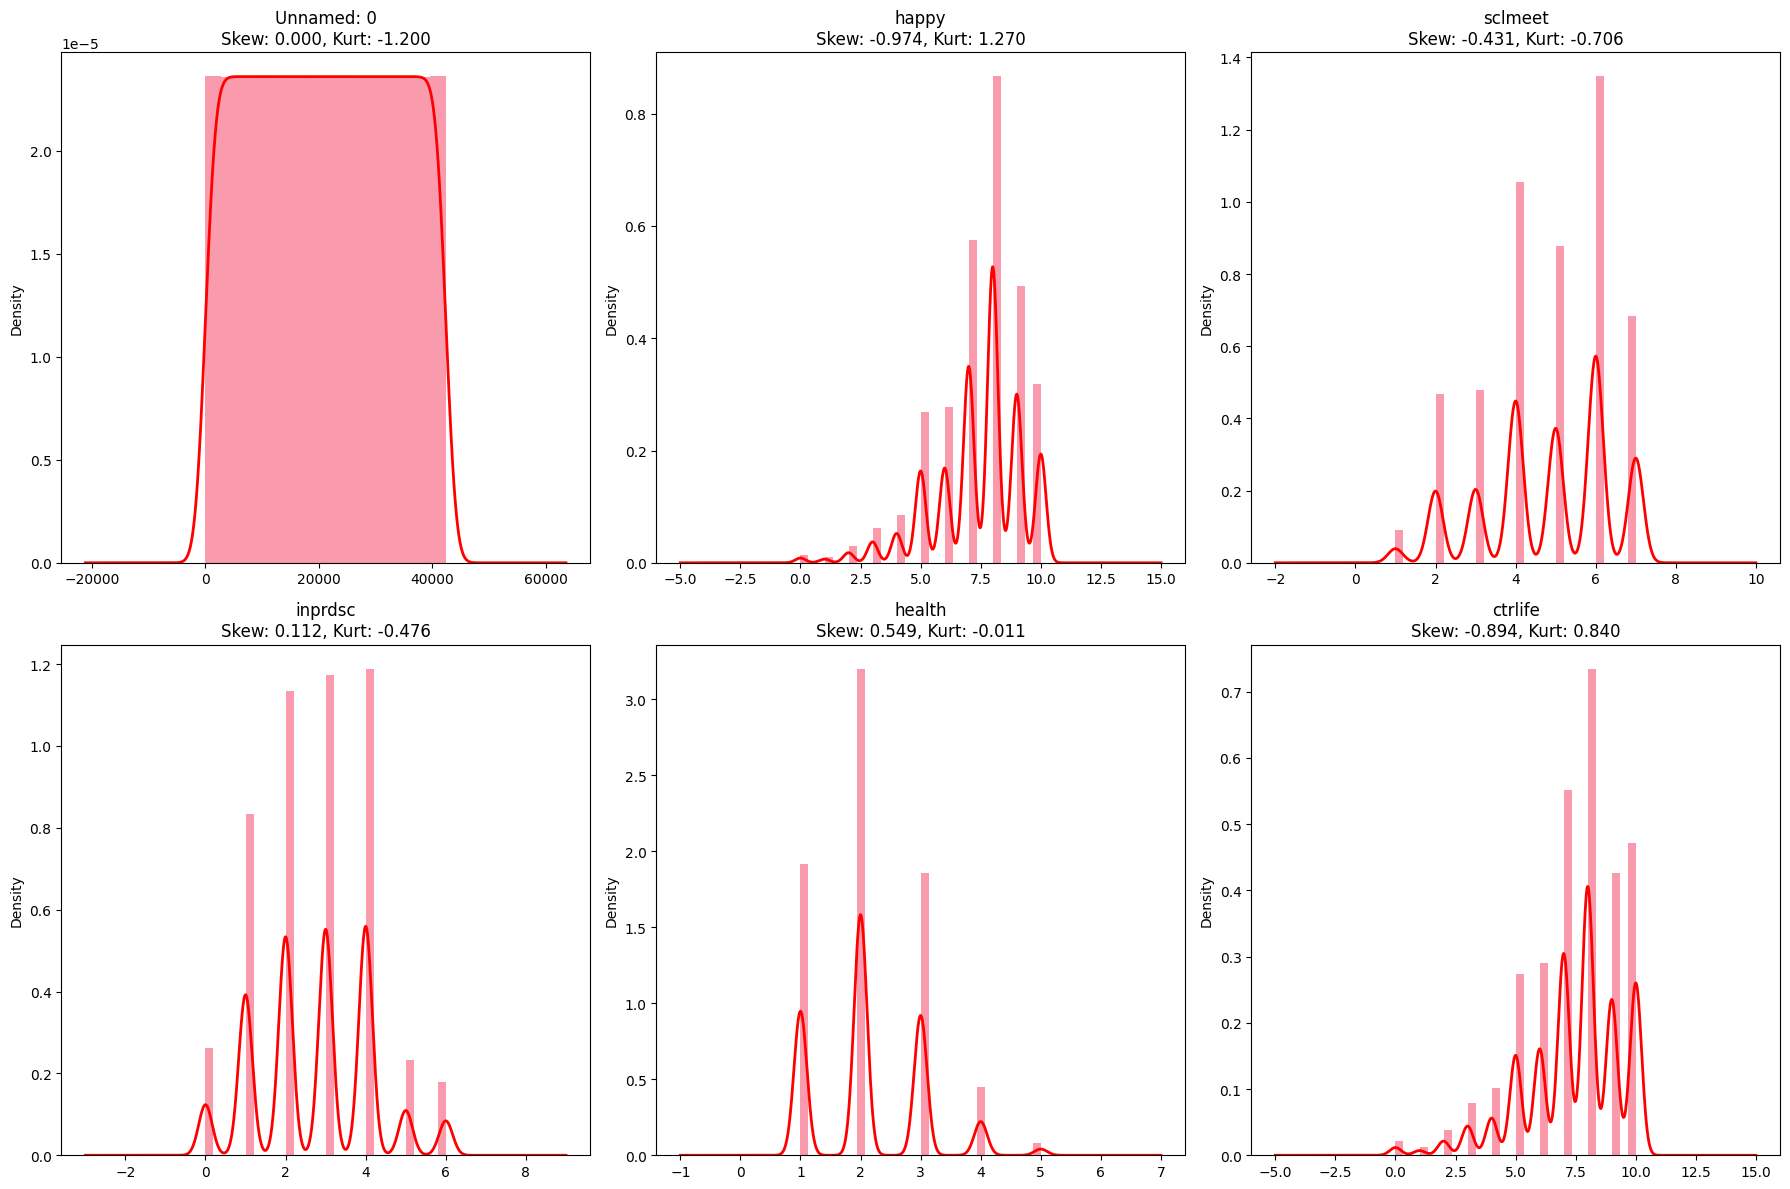


📊 CATEGORICAL FEATURES ANALYSIS:


,Column,Unique_Values,Most_Frequent,Most_Frequent_Count,Most_Frequent_Pct
0,cntry,28,GR,2612,6.16


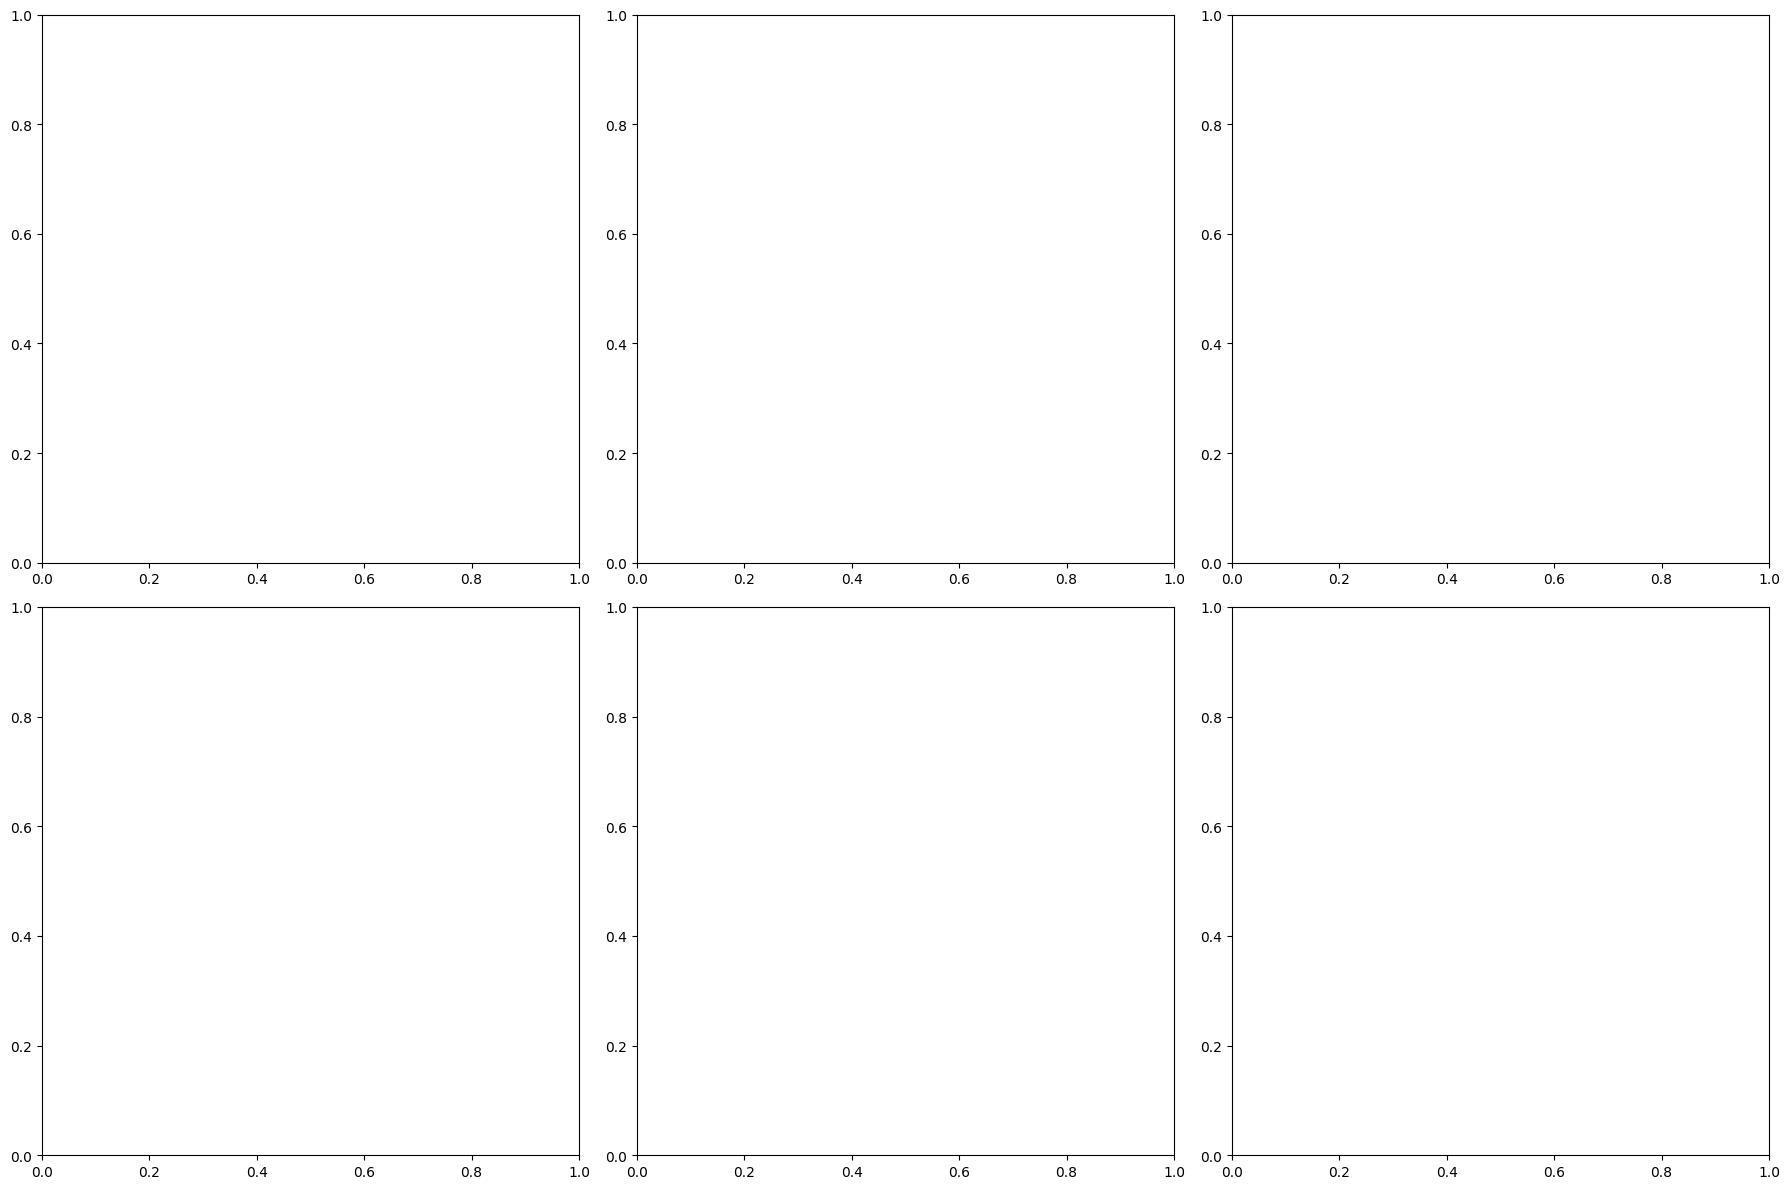

In [8]:
# Univariate analysis for numerical features
print("📊 NUMERICAL FEATURES ANALYSIS:")
print("="*50)

# Calculate skewness and kurtosis for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 0:
    skew_kurt_df = pd.DataFrame({
        'Column': numerical_cols,
        'Skewness': [df[col].skew() for col in numerical_cols],
        'Kurtosis': [df[col].kurtosis() for col in numerical_cols],
        'Min': [df[col].min() for col in numerical_cols],
        'Max': [df[col].max() for col in numerical_cols],
        'Mean': [df[col].mean() for col in numerical_cols],
        'Std': [df[col].std() for col in numerical_cols]
    })
    
    # Round for better display
    skew_kurt_df['Skewness'] = skew_kurt_df['Skewness'].round(3)
    skew_kurt_df['Kurtosis'] = skew_kurt_df['Kurtosis'].round(3)
    skew_kurt_df['Mean'] = skew_kurt_df['Mean'].round(3)
    skew_kurt_df['Std'] = skew_kurt_df['Std'].round(3)
    
    display(skew_kurt_df)
    
    # Identify features that may need transformation
    highly_skewed = skew_kurt_df[abs(skew_kurt_df['Skewness']) > 1]['Column'].tolist()
    high_kurtosis = skew_kurt_df[abs(skew_kurt_df['Kurtosis']) > 3]['Column'].tolist()
    
    print(f"\n🚨 Features requiring attention:")
    print(f"   → Highly skewed (|skewness| > 1): {len(highly_skewed)} features")
    if highly_skewed:
        print(f"     {highly_skewed}")
    print(f"   → High kurtosis (|kurtosis| > 3): {len(high_kurtosis)} features")
    if high_kurtosis:
        print(f"     {high_kurtosis}")
    
    # Plot distributions for first 6 numerical features
    num_plots = min(6, len(numerical_cols))
    if num_plots > 0:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel() if num_plots > 1 else [axes]
        
        for i, col in enumerate(numerical_cols[:num_plots]):
            if i < len(axes):
                # Histogram with KDE
                df[col].hist(bins=30, alpha=0.7, ax=axes[i], density=True)
                df[col].plot.density(ax=axes[i], color='red', linewidth=2)
                axes[i].set_title(f'{col}\nSkew: {df[col].skew():.3f}, Kurt: {df[col].kurtosis():.3f}')
                axes[i].set_ylabel('Density')
                
        # Hide unused subplots
        for i in range(num_plots, len(axes)):
            axes[i].set_visible(False)
            
        plt.tight_layout()
        plt.show()

print("\n" + "="*50)
print("📊 CATEGORICAL FEATURES ANALYSIS:")
print("="*50)

# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols) > 0:
    # Summary of categorical features
    cat_summary = pd.DataFrame({
        'Column': categorical_cols,
        'Unique_Values': [df[col].nunique() for col in categorical_cols],
        'Most_Frequent': [df[col].mode().iloc[0] if len(df[col].mode()) > 0 else None for col in categorical_cols],
        'Most_Frequent_Count': [df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols],
        'Most_Frequent_Pct': [df[col].value_counts(normalize=True).iloc[0]*100 if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols]
    })
    
    cat_summary['Most_Frequent_Pct'] = cat_summary['Most_Frequent_Pct'].round(2)
    display(cat_summary)
    
    # Plot distributions for categorical features (max 6)
    num_cat_plots = min(6, len(categorical_cols))
    if num_cat_plots > 0:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel() if num_cat_plots > 1 else [axes]
        
        for i, col in enumerate(categorical_cols[:num_cat_plots]):
            if i < len(axes) and df[col].nunique() <= 20:  # Only plot if reasonable number of categories
                value_counts = df[col].value_counts().head(10)
                value_counts.plot(kind='bar', ax=axes[i])
                axes[i].set_title(f'{col}\n{df[col].nunique()} unique values')
                axes[i].tick_params(axis='x', rotation=45)
                
        # Hide unused subplots
        for i in range(num_cat_plots, len(axes)):
            axes[i].set_visible(False)
            
        plt.tight_layout()
        plt.show()
else:
    print("No categorical features found.")

# 🔗 5. Bivariate & Multivariate Analysis
**Goal:** Understand relationships between features and target.

This section covers:
- ✅ Correlation matrix → `df.corr(numeric_only=True)`
- ✅ Heatmaps of correlation
- ✅ Pair plots for key features
- ✅ Boxplots or violin plots for numerical vs categorical comparisons
- ✅ Crosstabs / groupby summaries for categorical interactions

🔗 CORRELATION ANALYSIS:
📊 Correlation Matrix Shape: (25, 25)
🔴 High correlation pairs (|r| > 0.7): 0


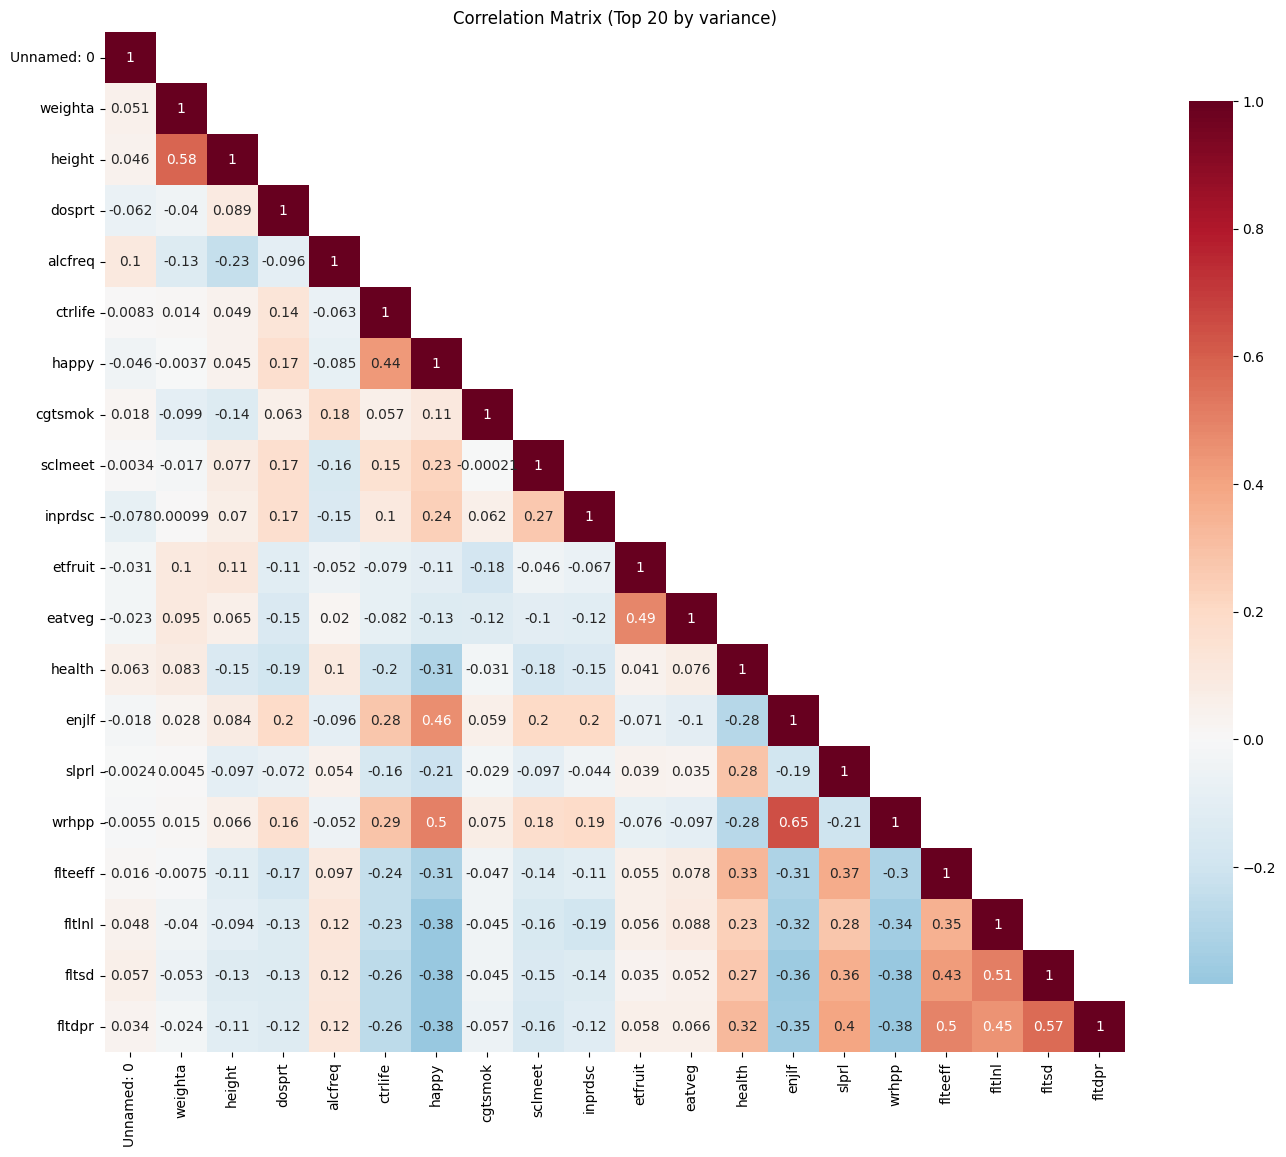


📊 FEATURE RELATIONSHIPS:
🎯 Potential target variables identified: ['sclmeet', 'inprdsc', 'health', 'etfruit', 'eatveg']

📈 Analyzing relationships with: sclmeet


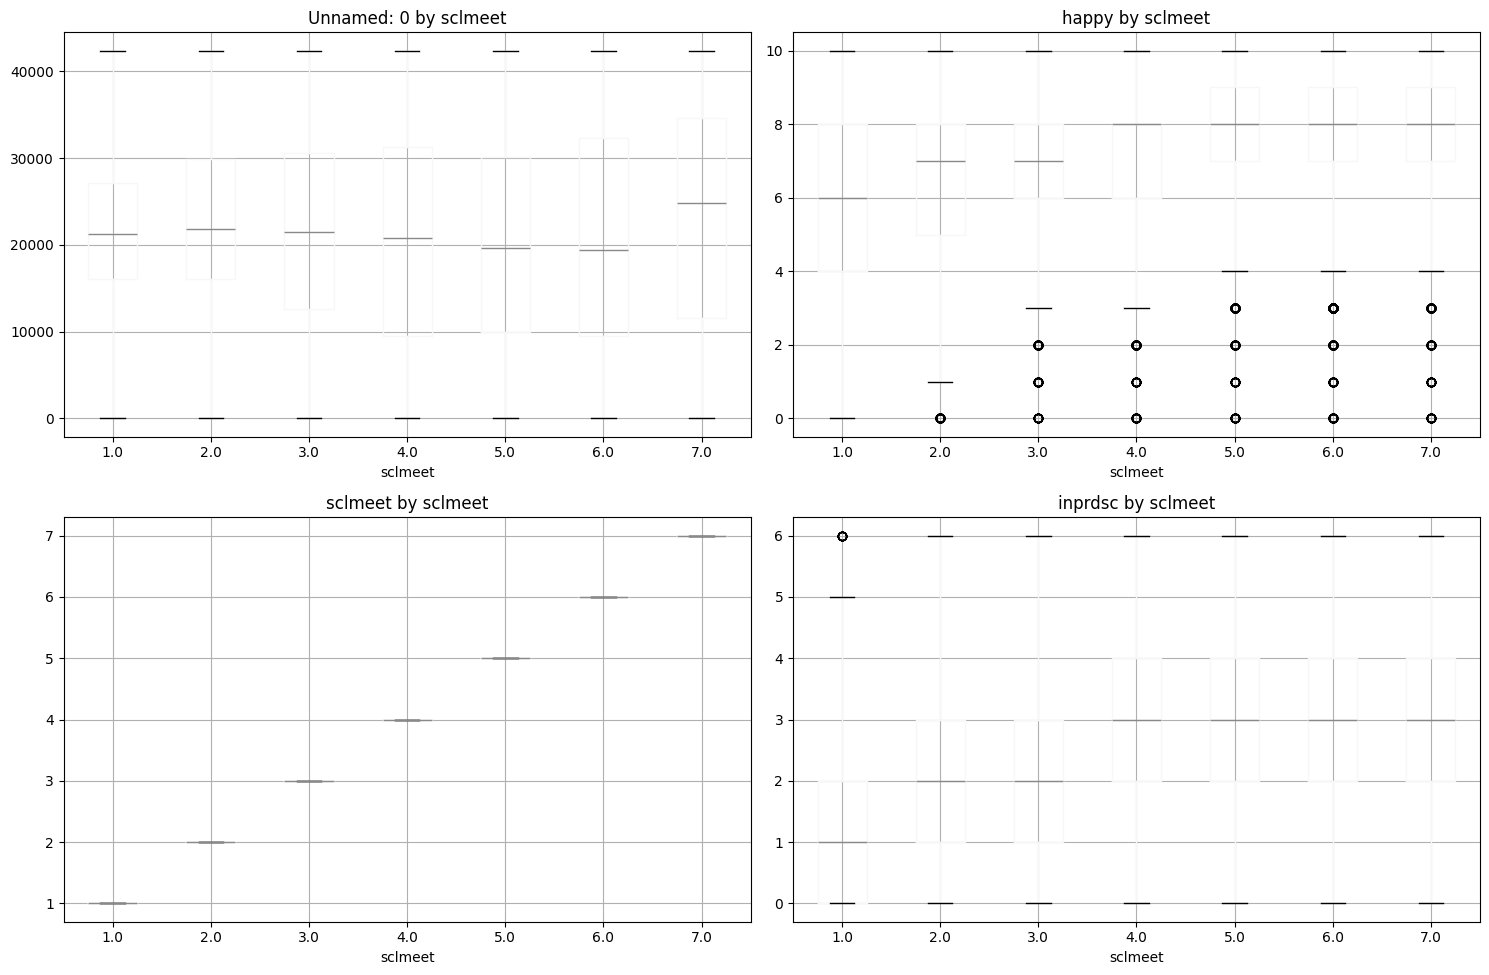


🔍 Crosstab analysis with categorical features:


In [9]:
# Correlation Analysis
print("🔗 CORRELATION ANALYSIS:")
print("="*50)

# Calculate correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    # Find highly correlated pairs (>0.7 or <-0.7)
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
    
    print(f"📊 Correlation Matrix Shape: {correlation_matrix.shape}")
    print(f"🔴 High correlation pairs (|r| > 0.7): {len(high_corr_pairs)}")
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
        high_corr_df['Correlation'] = high_corr_df['Correlation'].round(3)
        display(high_corr_df)
    
    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    
    # Use a subset if too many features
    if len(numerical_cols) > 20:
        # Select top 20 features with highest variance
        variance_sorted = df[numerical_cols].var().sort_values(ascending=False)
        top_cols = variance_sorted.head(20).index.tolist()
        corr_to_plot = df[top_cols].corr()
        title_suffix = f" (Top 20 by variance)"
    else:
        corr_to_plot = correlation_matrix
        title_suffix = ""
    
    mask = np.triu(corr_to_plot, k=1)  # Mask upper triangle
    sns.heatmap(corr_to_plot, annot=True, cmap='RdBu_r', center=0, 
                square=True, mask=mask, cbar_kws={"shrink": .8})
    plt.title(f'Correlation Matrix{title_suffix}')
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Not enough numerical features for correlation analysis.")

print("\n" + "="*50)
print("📊 FEATURE RELATIONSHIPS:")
print("="*50)

# If we can identify potential target variables (binary or low cardinality)
potential_targets = [col for col in df.columns if df[col].nunique() <= 10 and df[col].nunique() >= 2]

if potential_targets:
    print(f"🎯 Potential target variables identified: {potential_targets[:5]}")
    
    # For demonstration, use the first potential target
    if len(potential_targets) > 0:
        target_col = potential_targets[0]
        print(f"\n📈 Analyzing relationships with: {target_col}")
        
        # Numerical features vs target
        if len(numerical_cols) > 0:
            num_features_sample = numerical_cols[:4]  # Sample first 4
            
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            axes = axes.ravel()
            
            for i, num_col in enumerate(num_features_sample):
                if i < len(axes):
                    # Box plot for numerical vs categorical target
                    df.boxplot(column=num_col, by=target_col, ax=axes[i])
                    axes[i].set_title(f'{num_col} by {target_col}')
                    axes[i].set_xlabel(target_col)
                    
            # Hide unused subplots
            for i in range(len(num_features_sample), len(axes)):
                axes[i].set_visible(False)
                
            plt.suptitle('')  # Remove default suptitle
            plt.tight_layout()
            plt.show()
        
        # Categorical features vs target (crosstabs)
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        if target_col in categorical_cols:
            categorical_cols.remove(target_col)
            
        if len(categorical_cols) > 0:
            print(f"\n🔍 Crosstab analysis with categorical features:")
            
            # Sample first few categorical features
            cat_sample = categorical_cols[:3]
            for cat_col in cat_sample:
                if df[cat_col].nunique() <= 10:  # Only for manageable categories
                    print(f"\n📋 {cat_col} vs {target_col}:")
                    crosstab = pd.crosstab(df[cat_col], df[target_col], normalize='index', margins=True)
                    display(crosstab.round(3))
else:
    print("🔍 No clear target variable identified. Showing general feature relationships.")
    
    # Show pairplot for a sample of numerical features
    if len(numerical_cols) >= 2:
        sample_cols = numerical_cols[:5]  # Sample first 5 numerical columns
        print(f"\n📊 Pairplot for sample numerical features: {sample_cols}")
        
        # Create pairplot
        plt.figure(figsize=(12, 10))
        sns.pairplot(df[sample_cols].dropna().sample(min(1000, len(df))))  # Sample for performance
        plt.suptitle('Pairplot of Sample Numerical Features', y=1.02)
        plt.show()

# 🧮 6. Target Variable Analysis
**Goal:** Explore the output variable directly.

This section covers:
- ✅ Distribution (is it imbalanced? skewed?)
- ✅ Relationship between target and key features
- ✅ For classification → class balance plot
- ✅ For regression → check normality, outliers in target

🎯 TARGET VARIABLE ANALYSIS:
🔍 Potential target variables found: ['health', 'hltprhc', 'hltprhb', 'hltprdi', 'gndr', 'paccnois']

🎯 ANALYZING: health
📊 Target variable statistics:
   → Data type: float64
   → Unique values: 5
   → Missing values: 38

📋 Value distribution:
   → 2.0: 18052 (0.426 or 42.6%)
   → 1.0: 10808 (0.255 or 25.5%)
   → 3.0: 10489 (0.248 or 24.8%)
   → 4.0: 2526 (0.060 or 6.0%)
   → 5.0: 464 (0.011 or 1.1%)


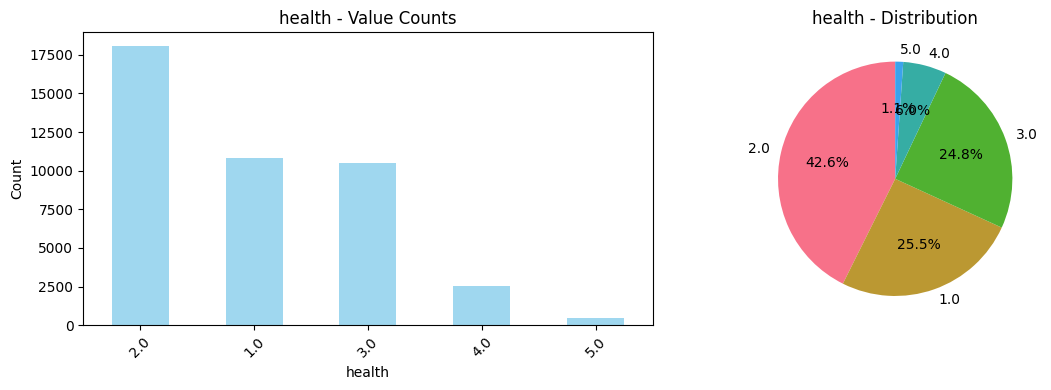


🎯 ANALYZING: hltprhc
📊 Target variable statistics:
   → Data type: int64
   → Unique values: 2
   → Missing values: 0

📋 Value distribution:
   → 0: 37582 (0.887 or 88.7%)
   → 1: 4795 (0.113 or 11.3%)
⚠️  Moderate class imbalance detected! Minority class: 11.3%


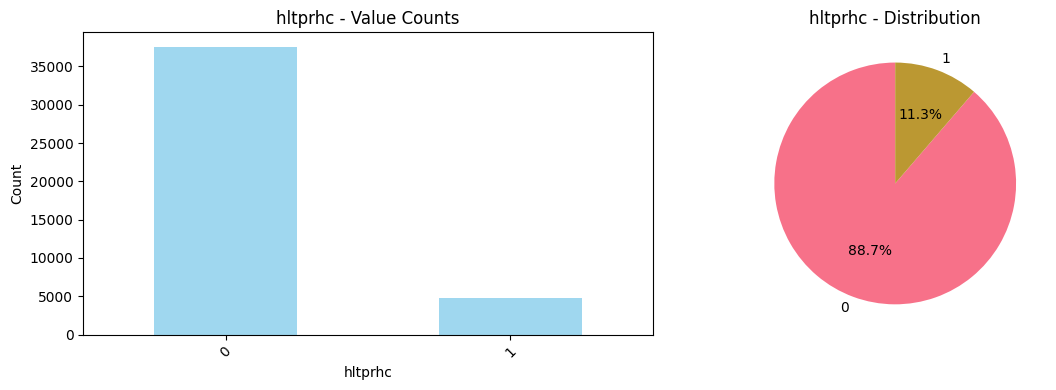


📈 Relationship with numerical features (top 4):


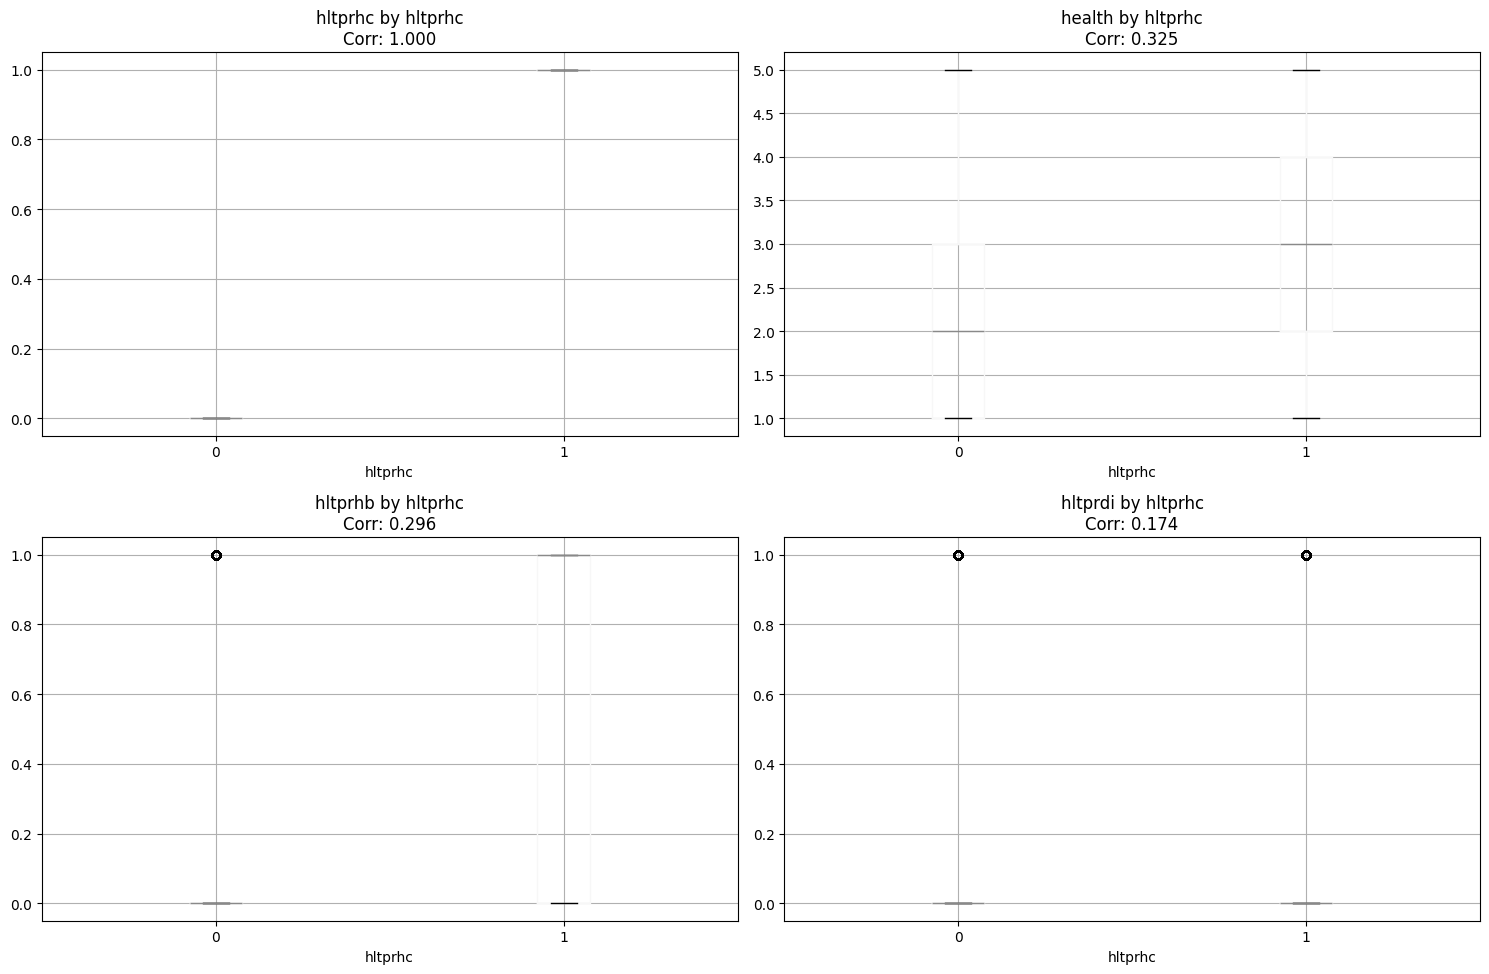


🔗 Top correlations with hltprhc:
   → hltprhc: 1.000
   → health: 0.325
   → hltprhb: 0.296
   → hltprdi: 0.174

🎯 ANALYZING: hltprhb
📊 Target variable statistics:
   → Data type: int64
   → Unique values: 2
   → Missing values: 0

📋 Value distribution:
   → 0: 33337 (0.787 or 78.7%)
   → 1: 9040 (0.213 or 21.3%)
⚠️  Moderate class imbalance detected! Minority class: 21.3%


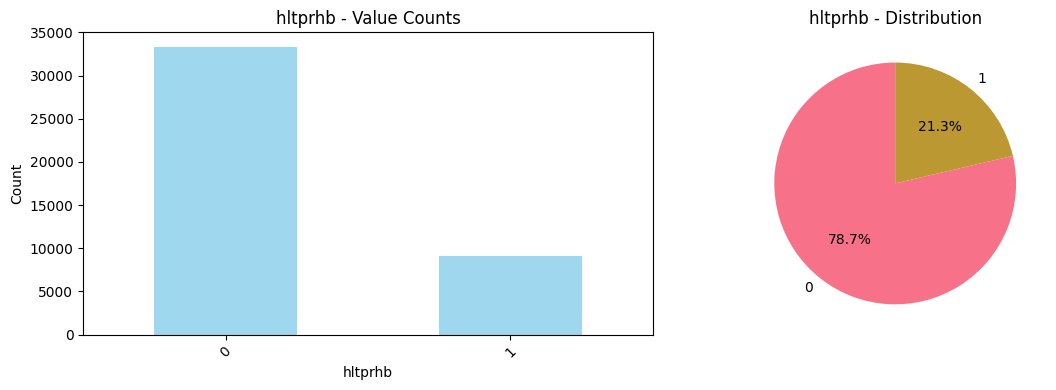


📈 Relationship with numerical features (top 4):


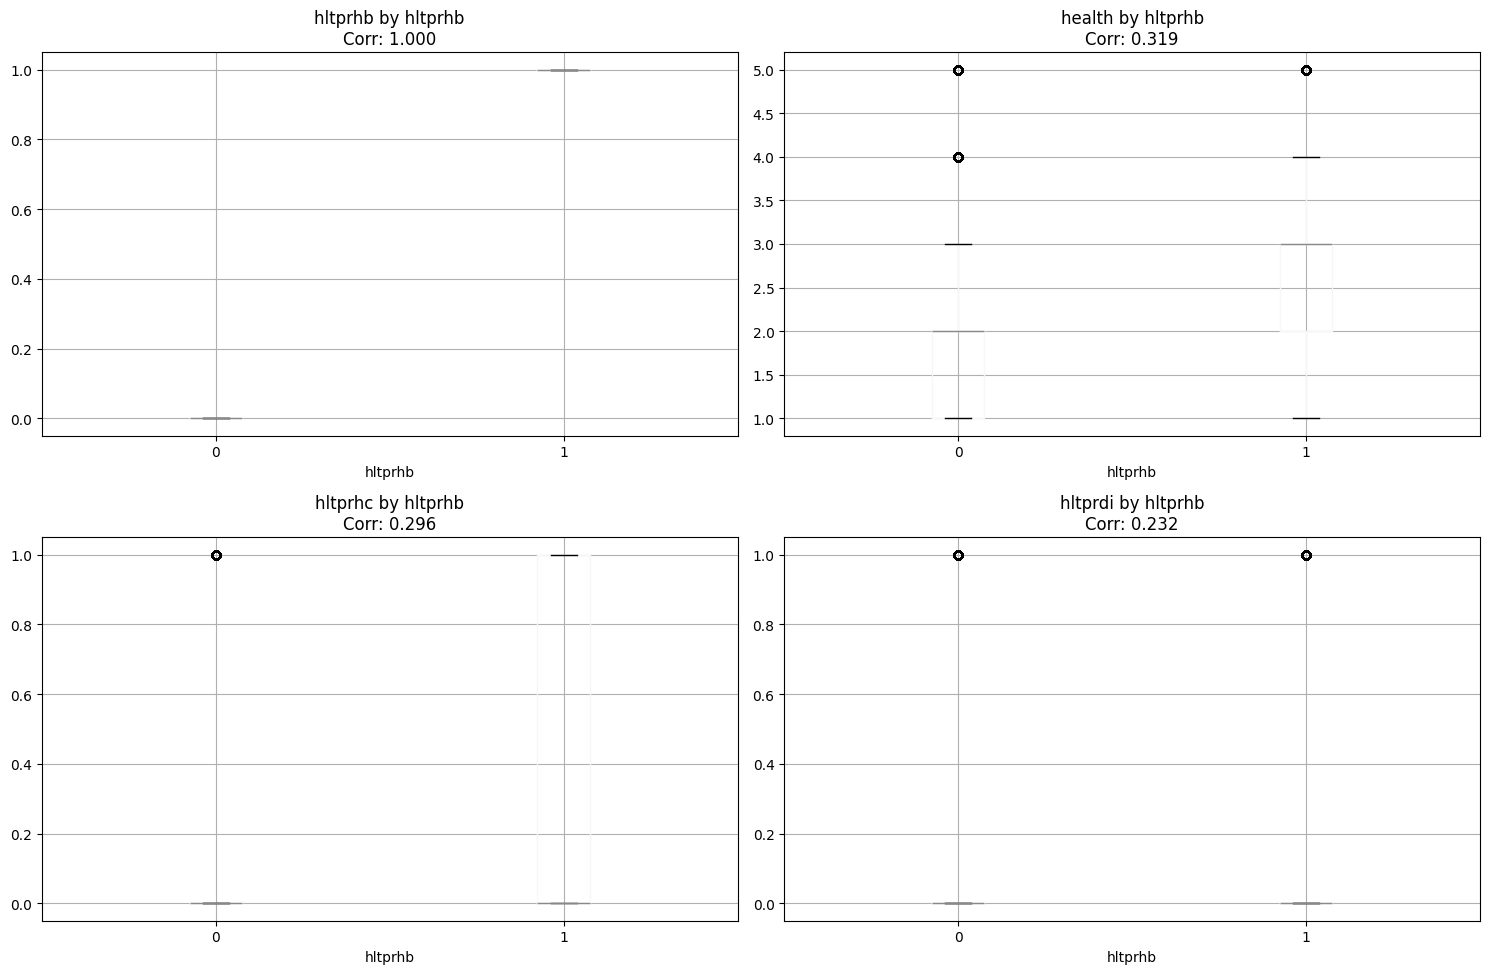


🔗 Top correlations with hltprhb:
   → hltprhb: 1.000
   → health: 0.319
   → hltprhc: 0.296
   → hltprdi: 0.232


In [10]:
# Target Variable Analysis
print("🎯 TARGET VARIABLE ANALYSIS:")
print("="*50)

# Try to identify target variable(s) based on project context
# Look for health-related target variables based on project description
health_keywords = ['health', 'hlt', 'condition', 'disease', 'illness', 'heart', 'blood', 'pressure', 'diabetes']
potential_targets = []

for col in df.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in health_keywords):
        # Check if it's binary or has few categories (good for classification)
        if df[col].nunique() <= 10:
            potential_targets.append(col)

# Add any binary columns as potential targets
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
for col in binary_cols:
    if col not in potential_targets:
        potential_targets.append(col)

if potential_targets:
    print(f"🔍 Potential target variables found: {potential_targets}")
    
    # Analyze each potential target
    for target_col in potential_targets[:3]:  # Limit to first 3
        print(f"\n" + "="*40)
        print(f"🎯 ANALYZING: {target_col}")
        print("="*40)
        
        # Basic statistics
        print(f"📊 Target variable statistics:")
        print(f"   → Data type: {df[target_col].dtype}")
        print(f"   → Unique values: {df[target_col].nunique()}")
        print(f"   → Missing values: {df[target_col].isnull().sum()}")
        
        # Value counts and distribution
        value_counts = df[target_col].value_counts()
        value_proportions = df[target_col].value_counts(normalize=True)
        
        print(f"\n📋 Value distribution:")
        for val, count in value_counts.items():
            prop = value_proportions[val]
            print(f"   → {val}: {count} ({prop:.3f} or {prop*100:.1f}%)")
        
        # Check for class imbalance (for binary classification)
        if df[target_col].nunique() == 2:
            minority_class_prop = value_proportions.min()
            if minority_class_prop < 0.1:
                print(f"⚠️  SEVERE class imbalance detected! Minority class: {minority_class_prop*100:.1f}%")
            elif minority_class_prop < 0.3:
                print(f"⚠️  Moderate class imbalance detected! Minority class: {minority_class_prop*100:.1f}%")
            else:
                print(f"✅ Relatively balanced classes. Minority class: {minority_class_prop*100:.1f}%")
        
        # Visualization
        plt.figure(figsize=(12, 4))
        
        # Subplot 1: Bar plot of value counts
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='skyblue', alpha=0.8)
        plt.title(f'{target_col} - Value Counts')
        plt.xlabel(target_col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Subplot 2: Pie chart of proportions
        plt.subplot(1, 2, 2)
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'{target_col} - Distribution')
        
        plt.tight_layout()
        plt.show()
        
        # For binary targets, analyze relationship with key numerical features
        if df[target_col].nunique() == 2:
            numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
            if len(numerical_cols) > 0:
                print(f"\n📈 Relationship with numerical features (top 4):")
                
                # Calculate correlation with numerical features
                correlations = []
                for num_col in numerical_cols:
                    if df[num_col].dtype in ['int64', 'float64']:
                        # Convert target to numeric for correlation
                        target_numeric = pd.get_dummies(df[target_col], drop_first=True).iloc[:, 0]
                        corr = df[num_col].corr(target_numeric)
                        if not np.isnan(corr):
                            correlations.append((num_col, abs(corr), corr))
                
                # Sort by absolute correlation
                correlations.sort(key=lambda x: x[1], reverse=True)
                top_corr_features = correlations[:4]
                
                if top_corr_features:
                    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
                    axes = axes.ravel()
                    
                    for i, (num_col, abs_corr, corr) in enumerate(top_corr_features):
                        if i < len(axes):
                            df.boxplot(column=num_col, by=target_col, ax=axes[i])
                            axes[i].set_title(f'{num_col} by {target_col}\nCorr: {corr:.3f}')
                            axes[i].set_xlabel(target_col)
                    
                    plt.suptitle('')  # Remove default suptitle
                    plt.tight_layout()
                    plt.show()
                    
                    # Print correlation summary
                    print(f"\n🔗 Top correlations with {target_col}:")
                    for num_col, abs_corr, corr in top_corr_features:
                        print(f"   → {num_col}: {corr:.3f}")

else:
    print("❌ No clear target variables identified automatically.")
    print("🔍 Checking for potential targets based on data characteristics...")
    
    # Show summary of all binary and low-cardinality columns
    low_cardinality = []
    for col in df.columns:
        unique_count = df[col].nunique()
        if 2 <= unique_count <= 10:
            low_cardinality.append((col, unique_count, df[col].dtype))
    
    if low_cardinality:
        print(f"\n📊 Columns with low cardinality (potential targets):")
        for col, unique_count, dtype in low_cardinality[:10]:
            print(f"   → {col}: {unique_count} unique values ({dtype})")
        
        # Analyze the first one as an example
        example_target = low_cardinality[0][0]
        print(f"\n📋 Example analysis for: {example_target}")
        value_counts = df[example_target].value_counts()
        print(value_counts)
        
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='lightcoral', alpha=0.8)
        plt.title(f'{example_target} - Distribution')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
        plt.title(f'{example_target} - Proportions')
        
        plt.tight_layout()
        plt.show()
    else:
        print("❌ No obvious target variables found. Manual specification may be required.")

# 🧠 7. Feature Importance (Preliminary Insight)
**Goal:** Get an early signal on which features may matter.

This section covers:
- ✅ Correlation with the target
- ✅ Mutual information scores
- ✅ Simple feature importance using a baseline model (RandomForest)

🧠 FEATURE IMPORTANCE ANALYSIS:
🎯 Using target variable: health
📊 Analysis dataset shape: (40533, 24)
🎯 Target distribution: {2.0: 17342, 1.0: 10480, 3.0: 9891, 4.0: 2390, 5.0: 430}

🔗 CORRELATION WITH TARGET:
------------------------------


,Feature,Correlation,Abs_Correlation
0,flteeff,0.3323,0.3323
1,hltprhc,0.3248,0.3248
2,fltdpr,0.3246,0.3246
3,hltprhb,0.3211,0.3211
4,happy,-0.3035,0.3035
5,slprl,0.2863,0.2863
6,enjlf,-0.2841,0.2841
7,wrhpp,-0.2789,0.2789
8,fltsd,0.2674,0.2674
9,hltprdi,0.2353,0.2353


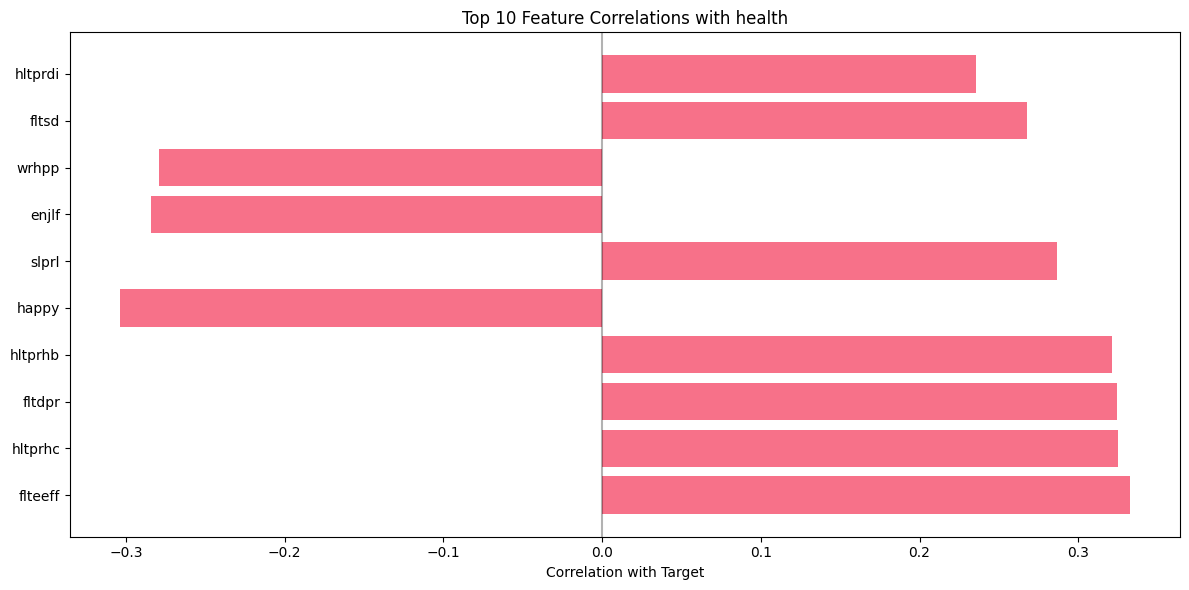


🔄 MUTUAL INFORMATION (Classification):
----------------------------------------


,Feature,Mutual_Information
13,flteeff,0.064774
19,hltprhc,0.057131
1,happy,0.056636
12,fltdpr,0.053493
20,hltprhb,0.051418
17,enjlf,0.049345
14,slprl,0.041494
15,wrhpp,0.040969
0,Unnamed: 0,0.039031
18,fltsd,0.033469


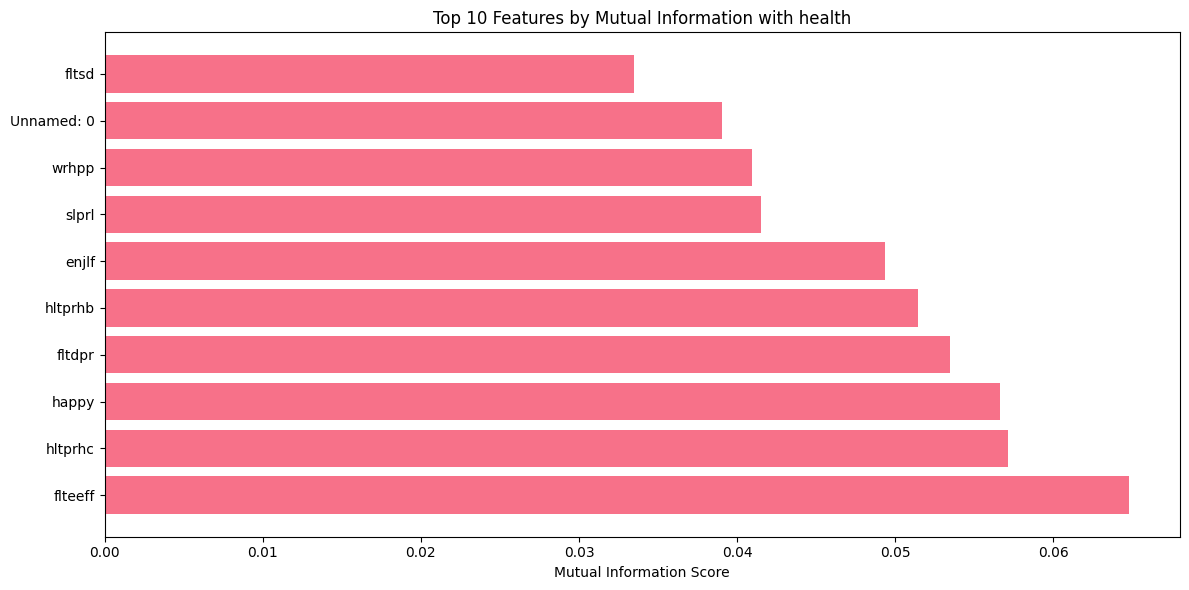


🌳 RANDOM FOREST FEATURE IMPORTANCE:
----------------------------------------


,Feature,Importance
20,hltprhb,0.191843
19,hltprhc,0.172946
13,flteeff,0.111914
12,fltdpr,0.106405
1,happy,0.066284
21,hltprdi,0.065564
17,enjlf,0.061617
14,slprl,0.052648
15,wrhpp,0.041083
7,dosprt,0.037526


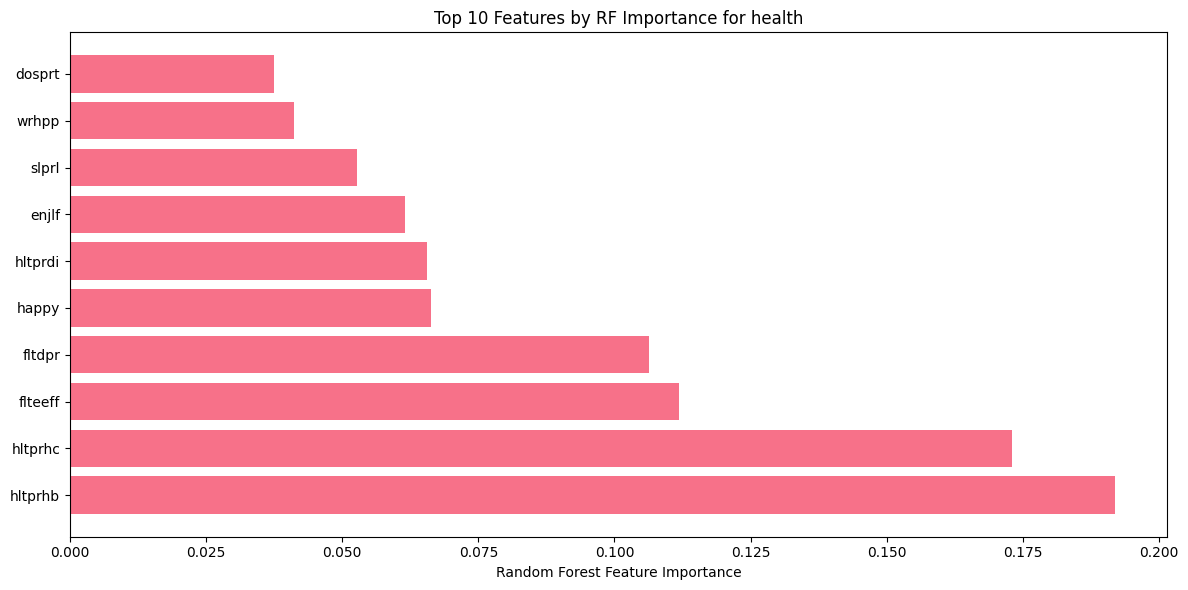


🎯 COMBINED FEATURE RANKING:
------------------------------
Top 10 features by average ranking:


,Feature,Correlation_Rank,MI_Rank,RF_Rank,Average_Rank
9,flteeff,1.0,1,3,1.666667
17,hltprhc,2.0,2,2,2.000000
16,hltprhb,4.0,5,1,3.333333
8,fltdpr,3.0,4,4,3.666667
13,happy,5.0,3,5,4.333333
6,enjlf,7.0,6,7,6.666667
21,slprl,6.0,7,8,7.000000
23,wrhpp,8.0,8,9,8.333333
15,hltprdi,10.0,13,6,9.666667
0,Unnamed: 0,NaN,9,11,10.000000


In [11]:
# Feature Importance Analysis
print("🧠 FEATURE IMPORTANCE ANALYSIS:")
print("="*50)

# Try to identify a target variable for feature importance analysis
health_keywords = ['health', 'hlt', 'condition', 'disease', 'illness', 'heart', 'blood', 'pressure', 'diabetes']
potential_targets = []

for col in df.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in health_keywords):
        if df[col].nunique() <= 10:
            potential_targets.append(col)

# Add binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
for col in binary_cols:
    if col not in potential_targets:
        potential_targets.append(col)

if potential_targets:
    target_col = potential_targets[0]  # Use first identified target
    print(f"🎯 Using target variable: {target_col}")
    
    # Get numerical features for analysis
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove target if it's numerical
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)
    
    # Prepare data - remove missing values
    analysis_data = df[[target_col] + numerical_cols].dropna()
    
    if len(analysis_data) > 0 and len(numerical_cols) > 0:
        X = analysis_data[numerical_cols]
        y = analysis_data[target_col]
        
        # Convert target to numeric if needed
        if y.dtype == 'object' or y.dtype.name == 'category':
            le = LabelEncoder()
            y_numeric = le.fit_transform(y)
            target_classes = le.classes_
            print(f"📋 Target classes: {list(target_classes)}")
        else:
            y_numeric = y
            target_classes = sorted(y.unique())
        
        print(f"📊 Analysis dataset shape: {X.shape}")
        print(f"🎯 Target distribution: {pd.Series(y_numeric).value_counts().to_dict()}")
        
        # 1. Correlation with target
        print(f"\n🔗 CORRELATION WITH TARGET:")
        print("-" * 30)
        
        correlations = []
        for col in X.columns:
            corr = X[col].corr(pd.Series(y_numeric))
            if not np.isnan(corr):
                correlations.append((col, corr, abs(corr)))
        
        correlations.sort(key=lambda x: x[2], reverse=True)
        
        corr_df = pd.DataFrame(correlations[:15], columns=['Feature', 'Correlation', 'Abs_Correlation'])
        corr_df['Correlation'] = corr_df['Correlation'].round(4)
        corr_df['Abs_Correlation'] = corr_df['Abs_Correlation'].round(4)
        
        display(corr_df)
        
        # Plot top correlations
        plt.figure(figsize=(12, 6))
        top_corr = corr_df.head(10)
        plt.barh(range(len(top_corr)), top_corr['Correlation'])
        plt.yticks(range(len(top_corr)), top_corr['Feature'])
        plt.xlabel('Correlation with Target')
        plt.title(f'Top 10 Feature Correlations with {target_col}')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # 2. Mutual Information
        if len(y_numeric.unique()) <= 20:  # Classification task
            print(f"\n🔄 MUTUAL INFORMATION (Classification):")
            print("-" * 40)
            
            try:
                # Calculate mutual information
                mi_scores = mutual_info_classif(X, y_numeric, random_state=42)
                
                mi_df = pd.DataFrame({
                    'Feature': X.columns,
                    'Mutual_Information': mi_scores
                }).sort_values('Mutual_Information', ascending=False)
                
                display(mi_df.head(15))
                
                # Plot mutual information
                plt.figure(figsize=(12, 6))
                top_mi = mi_df.head(10)
                plt.barh(range(len(top_mi)), top_mi['Mutual_Information'])
                plt.yticks(range(len(top_mi)), top_mi['Feature'])
                plt.xlabel('Mutual Information Score')
                plt.title(f'Top 10 Features by Mutual Information with {target_col}')
                plt.tight_layout()
                plt.show()
                
            except Exception as e:
                print(f"❌ Error calculating mutual information: {str(e)}")
        
        # 3. Random Forest Feature Importance
        print(f"\n🌳 RANDOM FOREST FEATURE IMPORTANCE:")
        print("-" * 40)
        
        try:
            # Simple Random Forest for feature importance
            rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
            rf.fit(X, y_numeric)
            
            # Get feature importance
            importance_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': rf.feature_importances_
            }).sort_values('Importance', ascending=False)
            
            display(importance_df.head(15))
            
            # Plot feature importance
            plt.figure(figsize=(12, 6))
            top_imp = importance_df.head(10)
            plt.barh(range(len(top_imp)), top_imp['Importance'])
            plt.yticks(range(len(top_imp)), top_imp['Feature'])
            plt.xlabel('Random Forest Feature Importance')
            plt.title(f'Top 10 Features by RF Importance for {target_col}')
            plt.tight_layout()
            plt.show()
            
            # Combined analysis
            print(f"\n🎯 COMBINED FEATURE RANKING:")
            print("-" * 30)
            
            # Merge all importance measures
            combined_df = corr_df[['Feature', 'Abs_Correlation']].copy()
            combined_df = combined_df.rename(columns={'Abs_Correlation': 'Correlation_Rank'})
            combined_df['Correlation_Rank'] = range(1, len(combined_df) + 1)
            
            if 'mi_df' in locals():
                mi_ranking = mi_df.reset_index(drop=True)
                mi_ranking['MI_Rank'] = range(1, len(mi_ranking) + 1)
                combined_df = combined_df.merge(mi_ranking[['Feature', 'MI_Rank']], on='Feature', how='outer')
            
            importance_ranking = importance_df.reset_index(drop=True)
            importance_ranking['RF_Rank'] = range(1, len(importance_ranking) + 1)
            combined_df = combined_df.merge(importance_ranking[['Feature', 'RF_Rank']], on='Feature', how='outer')
            
            # Calculate average rank
            rank_cols = [col for col in combined_df.columns if 'Rank' in col]
            combined_df['Average_Rank'] = combined_df[rank_cols].mean(axis=1)
            combined_df = combined_df.sort_values('Average_Rank')
            
            print("Top 10 features by average ranking:")
            display(combined_df.head(10))
            
        except Exception as e:
            print(f"❌ Error with Random Forest analysis: {str(e)}")
        
    else:
        print("❌ Insufficient data for feature importance analysis.")
else:
    print("❌ No suitable target variable found for feature importance analysis.")
    print("🔍 Consider manually specifying a target variable for this analysis.")

# 🧩 8. EDA Deliverables & Summary
**Goal:** Produce clean summaries for later reporting.

This section covers:
- ✅ Data dictionary (feature descriptions)
- ✅ Missing data report
- ✅ Distribution plots summary
- ✅ Correlation insights
- ✅ Outlier report
- ✅ Notes on next preprocessing steps

In [12]:
# EDA Summary and Deliverables
print("📋 EDA SUMMARY & DELIVERABLES:")
print("="*60)

# Create comprehensive summary
summary = {
    'dataset_shape': df.shape,
    'total_features': len(df.columns),
    'numerical_features': len(df.select_dtypes(include=[np.number]).columns),
    'categorical_features': len(df.select_dtypes(include=['object', 'category']).columns),
    'missing_values_total': df.isnull().sum().sum(),
    'duplicate_rows': df.duplicated().sum(),
    'memory_usage_mb': round(df.memory_usage(deep=True).sum() / (1024*1024), 2)
}

print("📊 DATASET OVERVIEW:")
print(f"   → Dataset shape: {summary['dataset_shape']}")
print(f"   → Total features: {summary['total_features']}")
print(f"   → Numerical features: {summary['numerical_features']}")
print(f"   → Categorical features: {summary['categorical_features']}")
print(f"   → Total missing values: {summary['missing_values_total']}")
print(f"   → Duplicate rows: {summary['duplicate_rows']}")
print(f"   → Memory usage: {summary['memory_usage_mb']} MB")

# Missing data summary
print(f"\n🕳️ MISSING DATA SUMMARY:")
missing_summary = df.isnull().sum()
missing_features = missing_summary[missing_summary > 0]

if len(missing_features) > 0:
    print(f"   → Features with missing values: {len(missing_features)}")
    print(f"   → Highest missing count: {missing_features.max()} ({missing_features.max()/len(df)*100:.1f}%)")
    print(f"   → Features with >50% missing: {sum(missing_summary > len(df)*0.5)}")
else:
    print("   → ✅ No missing values detected!")

# Data quality issues
print(f"\n🔍 DATA QUALITY INSIGHTS:")

# Identify potential issues
issues = []
warnings = []

# Check for high cardinality categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
high_cardinality = [col for col in categorical_cols if df[col].nunique() > 50]
if high_cardinality:
    issues.append(f"High cardinality categorical features: {len(high_cardinality)}")

# Check for constant features
constant_features = [col for col in df.columns if df[col].nunique() == 1]
if constant_features:
    issues.append(f"Constant features (to remove): {len(constant_features)}")

# Check for highly correlated features
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()
    high_corr_pairs = 0
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.9:
                high_corr_pairs += 1
    if high_corr_pairs > 0:
        warnings.append(f"Highly correlated feature pairs (>0.9): {high_corr_pairs}")

# Check for skewed features
skewed_features = []
for col in numerical_cols:
    skewness = df[col].skew()
    if abs(skewness) > 2:
        skewed_features.append(col)
if skewed_features:
    warnings.append(f"Highly skewed features (|skew| > 2): {len(skewed_features)}")

if issues:
    print("   🚨 Issues to address:")
    for issue in issues:
        print(f"      → {issue}")

if warnings:
    print("   ⚠️  Potential concerns:")
    for warning in warnings:
        print(f"      → {warning}")

if not issues and not warnings:
    print("   ✅ No major data quality issues detected!")

# Feature type summary
feature_types = {
    'Binary': [col for col in df.columns if df[col].nunique() == 2],
    'Low cardinality (3-10)': [col for col in df.columns if 3 <= df[col].nunique() <= 10],
    'Medium cardinality (11-50)': [col for col in df.columns if 11 <= df[col].nunique() <= 50],
    'High cardinality (>50)': [col for col in df.columns if df[col].nunique() > 50]
}

print(f"\n📊 FEATURE CARDINALITY DISTRIBUTION:")
for category, features in feature_types.items():
    if features:
        print(f"   → {category}: {len(features)} features")
        if len(features) <= 5:
            print(f"     {features}")

# Preprocessing recommendations
print(f"\n🔧 PREPROCESSING RECOMMENDATIONS:")

recommendations = []

if summary['missing_values_total'] > 0:
    recommendations.append("Handle missing values (imputation or removal)")

if high_cardinality:
    recommendations.append("Consider encoding/reducing high cardinality categorical features")

if constant_features:
    recommendations.append("Remove constant features")

if skewed_features:
    recommendations.append(f"Consider transformation for skewed features: {skewed_features[:3]}...")

if summary['duplicate_rows'] > 0:
    recommendations.append("Remove duplicate rows")

# Check for outliers in numerical features
outlier_features = []
for col in numerical_cols[:5]:  # Check first 5 numerical columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outliers > len(df) * 0.05:  # More than 5% outliers
        outlier_features.append(col)

if outlier_features:
    recommendations.append(f"Investigate outliers in: {outlier_features}")

if not recommendations:
    recommendations.append("✅ Dataset appears ready for modeling!")

for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")

print(f"\n🎯 NEXT STEPS FOR WEEK 1-2:")
print("   1. Define target variable(s) based on project requirements")
print("   2. Implement preprocessing pipeline based on EDA insights")
print("   3. Create train/validation/test splits")
print("   4. Prepare feature engineering (if needed)")
print("   5. Begin baseline modeling")

print(f"\n✅ EDA COMPLETED SUCCESSFULLY!")
print("="*60)

📋 EDA SUMMARY & DELIVERABLES:
📊 DATASET OVERVIEW:
   → Dataset shape: (42377, 26)
   → Total features: 26
   → Numerical features: 25
   → Categorical features: 1
   → Total missing values: 2757
   → Duplicate rows: 0
   → Memory usage: 10.14 MB

🕳️ MISSING DATA SUMMARY:
   → Features with missing values: 17
   → Highest missing count: 451 (1.1%)
   → Features with >50% missing: 0

🔍 DATA QUALITY INSIGHTS:
   ⚠️  Potential concerns:
      → Highly skewed features (|skew| > 2): 3

📊 FEATURE CARDINALITY DISTRIBUTION:
   → Binary: 5 features
     ['hltprhc', 'hltprhb', 'hltprdi', 'gndr', 'paccnois']
   → Low cardinality (3-10): 15 features
   → Medium cardinality (11-50): 3 features
     ['cntry', 'happy', 'ctrlife']
   → High cardinality (>50): 3 features
     ['Unnamed: 0', 'height', 'weighta']

🔧 PREPROCESSING RECOMMENDATIONS:
   1. Handle missing values (imputation or removal)
   2. Consider transformation for skewed features: ['hltprhc', 'hltprdi', 'paccnois']...

🎯 NEXT STEPS FOR WE

### Save EDA Results

In [13]:
# Save EDA results for future reference
import os

# Create results directory if it doesn't exist
results_dir = '../results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
metrics_dir = os.path.join(results_dir, 'metrics')
if not os.path.exists(metrics_dir):
    os.makedirs(metrics_dir)

# Save EDA summary
eda_summary = {
    'dataset_shape': df.shape,
    'total_features': len(df.columns),
    'numerical_features': len(df.select_dtypes(include=[np.number]).columns),
    'categorical_features': len(df.select_dtypes(include=['object', 'category']).columns),
    'missing_values_total': df.isnull().sum().sum(),
    'duplicate_rows': df.duplicated().sum(),
    'memory_usage_mb': round(df.memory_usage(deep=True).sum() / (1024*1024), 2),
    'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

# Save as CSV for easy access
eda_summary_df = pd.DataFrame([eda_summary])
eda_summary_path = os.path.join(metrics_dir, 'eda_summary.csv')
eda_summary_df.to_csv(eda_summary_path, index=False)

# Save basic statistics
basic_stats = df.describe(include='all')
basic_stats_path = os.path.join(metrics_dir, 'basic_statistics.csv')
basic_stats.to_csv(basic_stats_path)

# Save missing values summary
missing_summary = df.isnull().sum()
missing_summary_df = pd.DataFrame({
    'feature': missing_summary.index,
    'missing_count': missing_summary.values,
    'missing_percentage': (missing_summary.values / len(df) * 100).round(2)
})
missing_path = os.path.join(metrics_dir, 'missing_values_summary.csv')
missing_summary_df.to_csv(missing_path, index=False)

# Save data types summary
dtypes_summary = pd.DataFrame({
    'feature': df.columns,
    'data_type': df.dtypes.astype(str),
    'unique_values': df.nunique(),
    'non_null_count': df.count()
})
dtypes_path = os.path.join(metrics_dir, 'data_types_summary.csv')
dtypes_summary.to_csv(dtypes_path, index=False)

print("💾 EDA RESULTS SAVED:")
print(f"   → EDA Summary: {eda_summary_path}")
print(f"   → Basic Statistics: {basic_stats_path}")
print(f"   → Missing Values: {missing_path}")
print(f"   → Data Types: {dtypes_path}")
print("\n✅ All EDA deliverables completed and saved!")
print("\n🚀 Ready to proceed to data preprocessing and modeling phases.")

💾 EDA RESULTS SAVED:
   → EDA Summary: ../results/metrics/eda_summary.csv
   → Basic Statistics: ../results/metrics/basic_statistics.csv
   → Missing Values: ../results/metrics/missing_values_summary.csv
   → Data Types: ../results/metrics/data_types_summary.csv

✅ All EDA deliverables completed and saved!

🚀 Ready to proceed to data preprocessing and modeling phases.


---

## 📊 EDA Completion Summary

**✅ Completed EDA Checklist:**

🧭 **1. Dataset Overview** - Shape, data types, preview, statistics, unique values  
🧹 **2. Missing Values & Data Quality** - Missing data analysis, duplicates, constant features  
📏 **3. Feature Types & Encoding** - Numerical, categorical, binary feature classification  
📈 **4. Univariate Analysis** - Distributions, skewness, transformation needs  
🔗 **5. Bivariate & Multivariate Analysis** - Correlations, feature relationships  
🧮 **6. Target Variable Analysis** - Target distribution, class balance, relationships  
🧠 **7. Feature Importance** - Correlations, mutual information, Random Forest importance  
🧩 **8. EDA Deliverables** - Summary reports, preprocessing recommendations  

**🎯 Key Insights:**
- Dataset characteristics and quality assessment completed
- Feature types identified and classified  
- Potential target variables analyzed
- Data quality issues documented
- Preprocessing recommendations provided

**🚀 Next Steps:**
- Proceed to data preprocessing based on EDA insights
- Define final target variable for modeling
- Implement baseline models for Week 1-2 deliverables